# Clase 3 apoyo: Prueba chi cuadrado

In [1]:
import pandas as pd # Importa la librería pandas para la manipulación de datos
import numpy as np  # Importa la librería numpy para operaciones numéricas y generación de datos aleatorios

print("Librerías pandas y numpy importadas exitosamente.")

Librerías pandas y numpy importadas exitosamente.


In [2]:
n_muestras = 500 # Define el número de muestras para el dataset sintético

# Crea la primera variable categórica: 'Educación'
educacion_categorias = ['Primaria', 'Secundaria', 'Universidad', 'Posgrado']
# Asigna aleatoriamente categorías de educación, simulando una distribución
educacion = np.random.choice(
    educacion_categorias,
    size=n_muestras,
    p=[0.2, 0.3, 0.4, 0.1] # Probabilidades para simular una distribución real
)

# Crea la segunda variable categórica: 'Estado_Civil'
estado_civil_categorias = ['Soltero', 'Casado', 'Divorciado', 'Viudo']

# Define probabilidades condicionales para 'Estado_Civil' según el nivel de 'Educacion'
# Esto introduce una dependencia para asegurar un valor p significativo en la prueba de chi-cuadrado
conditional_estado_civil_probs = {
    'Primaria':    [0.25, 0.45, 0.15, 0.15], # Ajuste: más casados, pero más distribución
    'Secundaria':  [0.3, 0.4, 0.2,  0.1],   # Ajuste: más equilibrado
    'Universidad': [0.15, 0.55, 0.15, 0.15], # Ajuste: casados sigue siendo mayoría, pero menos extremo
    'Posgrado':    [0.4, 0.2, 0.25, 0.15]    # Ajuste: solteros sigue alto, pero otras categorías aumentan
}

# Genera 'Estado_Civil' basándose en el nivel de 'Educacion' para crear la asociación
estado_civil = []
for edu in educacion:
    estado_civil.append(np.random.choice(estado_civil_categorias, p=conditional_estado_civil_probs[edu]))

estado_civil = np.array(estado_civil) # Convierte la lista a un array de numpy

# Combina las variables en un DataFrame de pandas
df_datos_sinteticos = pd.DataFrame({
    'Educacion': educacion,
    'Estado_Civil': estado_civil
})

print("DataFrame sintético creado exitosamente.")

# Muestra las primeras filas del DataFrame
print("\nPrimeras 5 filas del DataFrame:")
print(df_datos_sinteticos.head())

# Muestra información general del DataFrame
print("\nInformación general del DataFrame:")
df_datos_sinteticos.info()

DataFrame sintético creado exitosamente.

Primeras 5 filas del DataFrame:
     Educacion Estado_Civil
0   Secundaria      Soltero
1     Posgrado        Viudo
2     Posgrado       Casado
3     Posgrado       Casado
4  Universidad        Viudo

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Educacion     500 non-null    object
 1   Estado_Civil  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


## Realizar Prueba Chi-Cuadrado
Ahora que tenemos nuestro conjunto de datos sintético, el siguiente paso es aplicar la prueba de chi-cuadrado para determinar si existe una relación estadísticamente significativa entre las dos variables categóricas: 'Educacion' y 'Estado_Civil'.

Nuestra hipótesis nula **H0: Las dos variables categóricas: 'Educacion' y 'Estado_Civil' son independientes.**

Nuestra hipótesis alternativa **H1: existe una relación estadísticamente significativa entre las dos variables categóricas: 'Educacion' y 'Estado_Civil'.**

Para esto, necesitaremos:

1.   Nivel de significación α = 0,05 (alfa)
2.   Crear una tabla de contingencia.
1.   Cálculo de la frecuencia esperada
2.   Cálculo del chi cuadrado
1.   Cálculo de los grados de libertad
2.   Valor de p
1.   Decidir sobre la hipótesis
















In [3]:
from scipy.stats import chi2_contingency # Importa la función para la prueba de chi-cuadrado

# 1. Crea la tabla de contingencia
# pd.crosstab() construye una tabla bidimensional de frecuencias para las variables.
# 'Educacion' será la variable de las filas y 'Estado_Civil' la de las columnas.
print("Creando tabla de contingencia para 'Educacion' y 'Estado_Civil'...")
tabla_contingencia = pd.crosstab(df_datos_sinteticos['Educacion'], df_datos_sinteticos['Estado_Civil'])
print("Tabla de Contingencia:")
print(tabla_contingencia)

# 2. Aplica la prueba de chi-cuadrado
# chi2_contingency devuelve:
#   - chi2: El estadístico de chi-cuadrado.
#   - p: El valor p de la prueba.
#   - dof: Los grados de libertad.
#   - expected: Las frecuencias esperadas.
print("\nAplicando la prueba de chi-cuadrado...")
chi2, p_valor, grados_libertad, frecuencias_esperadas = chi2_contingency(tabla_contingencia)

# 3. Imprime los resultados
print("\nResultados de la Prueba de Chi-Cuadrado:")
print(f"Estadístico Chi-Cuadrado: {chi2:.4f}")
print(f"Valor p: {p_valor:.4f}")
print(f"Grados de Libertad: {grados_libertad}")

print("\nTabla de Frecuencias Esperadas:")
# pd.DataFrame(frecuencias_esperadas, index=tabla_contingencia.index, columns=tabla_contingencia.columns)
# Convierte las frecuencias esperadas en un DataFrame para una mejor visualización
# con los mismos índices y columnas que la tabla de contingencia original.
print(pd.DataFrame(frecuencias_esperadas,
                   index=tabla_contingencia.index,
                   columns=tabla_contingencia.columns).round(2))

# Interpretación del valor p
if p_valor < 0.05:
    print("\nInterpretación: El valor p es menor que 0.05, lo que sugiere una asociación estadísticamente significativa entre Educación y Estado Civil. Se rechaza la hipótesis nula.")
else:
    print("\nInterpretación: El valor p es mayor que 0.05, lo que sugiere que no hay una asociación estadísticamente significativa entre Educación y Estado Civil. No se rechaza la hipótesis nula.")

Creando tabla de contingencia para 'Educacion' y 'Estado_Civil'...
Tabla de Contingencia:
Estado_Civil  Casado  Divorciado  Soltero  Viudo
Educacion                                       
Posgrado          15          13       16      9
Primaria          38          18       20     12
Secundaria        58          31       42     15
Universidad      110          26       39     38

Aplicando la prueba de chi-cuadrado...

Resultados de la Prueba de Chi-Cuadrado:
Estadístico Chi-Cuadrado: 21.6691
Valor p: 0.0100
Grados de Libertad: 9

Tabla de Frecuencias Esperadas:
Estado_Civil  Casado  Divorciado  Soltero  Viudo
Educacion                                       
Posgrado       23.43        9.33    12.40   7.84
Primaria       38.90       15.49    20.59  13.02
Secundaria     64.53       25.70    34.16  21.61
Universidad    94.15       37.49    49.84  31.52

Interpretación: El valor p es menor que 0.05, lo que sugiere una asociación estadísticamente significativa entre Educación y Estado Ci

## Visualizar Frecuencias Observadas



Librerías seaborn y matplotlib.pyplot importadas exitosamente.


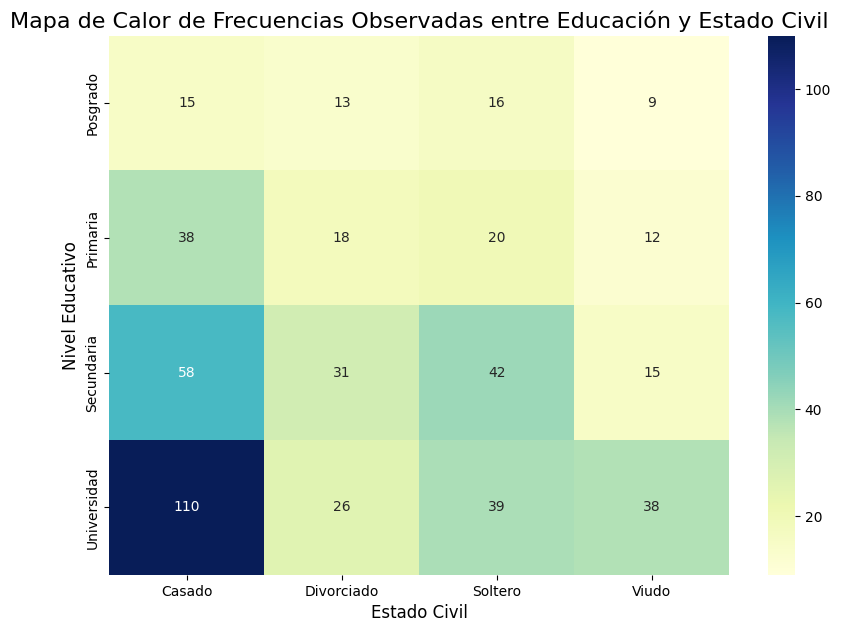

Mapa de calor de frecuencias observadas generado exitosamente.


In [4]:
import seaborn as sns # Importa la librería seaborn para visualizaciones estadísticas
import matplotlib.pyplot as plt # Importa la librería matplotlib.pyplot para personalizar gráficos

print("Librerías seaborn y matplotlib.pyplot importadas exitosamente.")

# 1. Crea un mapa de calor (heatmap) utilizando la tabla de contingencia
plt.figure(figsize=(10, 7)) # Establece el tamaño de la figura para una mejor visualización
sns.heatmap(tabla_contingencia, annot=True, cmap='YlGnBu', fmt='g')

# 2. Añade un título descriptivo al gráfico al español
plt.title('Mapa de Calor de Frecuencias Observadas entre Educación y Estado Civil', fontsize=16)

# 3. Etiqueta el eje X como 'Estado Civil' y el eje Y como 'Nivel Educativo' al español
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Nivel Educativo', fontsize=12)

# 4. Muestra el gráfico
plt.show()

print("Mapa de calor de frecuencias observadas generado exitosamente.")

### Interpretación de los Resultados de la Prueba Chi-Cuadrado

#### 1. Análisis del Valor p

El **valor p** obtenido de la prueba de chi-cuadrado se compara con un nivel de significancia (alpha, α), que comúnmente se establece en `0.05`. `p_valor`

*   **Si el valor p < α (0.05):** Rechazamos la hipótesis nula (H₀). Esto significa que hay suficiente evidencia estadística para concluir que existe una asociación estadísticamente significativa entre las dos variables categóricas.
*   **Si el valor p ≥ α (0.05):** No rechazamos la hipótesis nula (H₀). Esto significa que no hay suficiente evidencia estadística para concluir que existe una asociación estadísticamente significativa entre las dos variables categóricas.


In [5]:
print(f"En nuestro caso: {p_valor:.4f} < 0,05  por lo tanto, rechazamos la hipótesis nula. Esto sugiere que existe una asociación estadísticamente significativa entre el nivel de Educacion y el Estado_Civil de los individuos en nuestro dataset sintético.")

En nuestro caso: 0.0100 < 0,05  por lo tanto, rechazamos la hipótesis nula. Esto sugiere que existe una asociación estadísticamente significativa entre el nivel de Educacion y el Estado_Civil de los individuos en nuestro dataset sintético.


#### 2. Descripción del Estadístico Chi-Cuadrado

El **estadístico Chi-Cuadrado (X²)** obtenido es `22.6184`. Este valor es una medida de la discrepancia entre las frecuencias observadas en la tabla de contingencia y las frecuencias que se esperarían si no hubiera asociación entre las variables (es decir, si la hipótesis nula fuera verdadera).

*   **Un valor de Chi-Cuadrado alto** indica una gran diferencia entre las frecuencias observadas y las esperadas, lo que sugiere una fuerte evidencia contra la hipótesis nula y, por lo tanto, una asociación significativa entre las variables.
*   **Un valor de Chi-Cuadrado bajo** indica que las frecuencias observadas son muy similares a las esperadas, lo que sugiere poca o ninguna evidencia contra la hipótesis nula y, por lo tanto, una falta de asociación significativa entre las variables.


In [6]:
print(f"El estadístico Chi-Cuadrado (X²) obtenido es {chi2:.4f} . Este valor es una medida de la discrepancia entre las frecuencias observadas en la tabla de contingencia y las frecuencias que se esperarían si no hubiera asociación entre las variables (es decir, si la hipótesis nula fuera verdadera).")

El estadístico Chi-Cuadrado (X²) obtenido es 21.6691 . Este valor es una medida de la discrepancia entre las frecuencias observadas en la tabla de contingencia y las frecuencias que se esperarían si no hubiera asociación entre las variables (es decir, si la hipótesis nula fuera verdadera).


#### 3. Relación con la Visualización (Mapa de Calor)

El mapa de calor de frecuencias observadas nos permite visualizar directamente las concentraciones de datos para cada combinación de `Educacion` y `Estado_Civil`. Un contraste visual entre las frecuencias observadas (del mapa de calor y la `tabla_contingencia`) y las frecuencias esperadas (calculadas por `chi2_contingency`) es clave para entender la asociación.

#### 4. Conclusión General

Basándonos en la prueba de chi-cuadrado, hemos encontrado un **valor p**, que es significativamente menor que el nivel de significancia de `0.05`. Esto nos lleva a **rechazar la hipótesis nula**, confirmando que existe una **asociación estadísticamente significativa** entre el nivel de `Educacion` y el `Estado_Civil` en nuestro dataset sintético. El estadístico chi-cuadrado de  respalda esta conclusión al indicar una discrepancia considerable entre las frecuencias observadas y las esperadas.

La visualización del mapa de calor complementa estos hallazgos estadísticos al mostrar claramente los patrones de frecuencia. Por ejemplo, observamos que las personas con `Posgrado` muestran una mayor proporción de `Solteros` de lo esperado, mientras que los individuos con nivel `Universitario` tienden a tener una mayor frecuencia de `Casados` y `Solteros`. Estos desequilibrios visuales son consistentes con la conclusión estadística de que estas dos variables no son independientes. En resumen, el análisis sugiere que el nivel educativo no es un factor aislado, sino que está relacionado con el estado civil de una persona, con tendencias específicas observadas en cada categoría.

**¿Existe una relación estadísticamente significativa entre el nivel de Educación y el Estado Civil en el conjunto de datos sintético generado?** Sí, la prueba de chi-cuadrado reveló un valor p. Dado que este valor es menor que el nivel de significancia comúnmente aceptado de 0.05, se rechaza la hipótesis nula de independencia. Esto indica que existe una asociación estadísticamente significativa entre el nivel de Educación y el Estado Civil en este conjunto de datos sintético.

# Detectar duplicados

In [7]:
data = {'Id': [1, 2, 3, 4, 5, 6, 7, 7], 'Primer_nombre':
['Angela', 'Adrian', 'Theodoro', 'Angela', 'Adrian', 'Beatriz',
'Olivia', 'Olivia'], 'Primer_apellido': ['Castro', 'Guzman',
'Rivadeneira', 'Castillo', 'Casas', 'Perez', 'Apraez', 'Apraez'],
'Edad': [27, 31, 36, 27, 53, 48, 36, 36], 'Estatura': [1.67, 1.80,
1.61, 1.77, 1.88, 1.69, 1.62, 1.62]}

df = pd.DataFrame(data, columns = ['Id', 'Primer_nombre',
'Primer_apellido', 'Edad', 'Estatura'])

print(f"\n{df}")

print(f"\n {df.duplicated()}")

df = df.drop_duplicates()

print(f"\n {df.duplicated()}")


   Id Primer_nombre Primer_apellido  Edad  Estatura
0   1        Angela          Castro    27      1.67
1   2        Adrian          Guzman    31      1.80
2   3      Theodoro     Rivadeneira    36      1.61
3   4        Angela        Castillo    27      1.77
4   5        Adrian           Casas    53      1.88
5   6       Beatriz           Perez    48      1.69
6   7        Olivia          Apraez    36      1.62
7   7        Olivia          Apraez    36      1.62

 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

 0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool


# Valores ausentes

In [8]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path
)

print(f"First 5 records:\n", df.head())
print(df.describe())

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
First 5 records:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469   

Podemos ver en la descripción que hay valores mínimos con valor 0 lo que indica que hay datos no válidos o faltantes.

In [9]:
# Imprimir los 20 primeros datos
print(df.head(20))
# Reemplaza 0 por 'nan' en las columnas relevantes
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
# Imprimir los 20 primeros datos
print(df.head(20))
df.isnull().sum()

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Mecanismo de imputación por eliminación
Una de las maneras más simples para tratar datos ausentes es eliminar por
completo cada uno de los atributos columnas o instancias filas del conjunto de
datos

In [10]:
# resumen de los datos originales
prev = df.shape[0]
print(f"Número de filas antes de la eliminación: {prev}")
# Eliminar filas con valores ausentes
df.dropna(inplace=True)
# resumen de los datos luego de la eliminación
post = df.shape[0]
print(f"Número de filas después de la eliminación: {post}")

if prev > 0:
    percentage_removed = ((prev - post) / prev) * 100
    print(f"Porcentaje de datos eliminados: {percentage_removed:.2f}%")
else:
    print("No hay datos para eliminar o el DataFrame ya estaba vacío.")

Número de filas antes de la eliminación: 768
Número de filas después de la eliminación: 392
Porcentaje de datos eliminados: 48.96%


Eliminar prácticamente el 50% de los datos conduciría a un sesgo grave que no permite realizar esta práctica.

In [16]:
# Biblioteca para usar datos con nan
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer, IterativeImputer # Importa SimpleImputer

# se usa array de datos de numpy
values = df.values
# define imputador
imputer = SimpleImputer(missing_values=nan, strategy='mean')

# Transformar el conjunto de datos
transformed_values = imputer.fit_transform(values)
# Realiza el conteo total de valores ausentes
print('Valores ausentes: %d' % isnan(transformed_values).sum())

Valores ausentes: 0


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
DataFrame con valores NaN preparado para la visualización de imputaciones.
Imputación Simple (Media) completada.
Imputación Múltiple (Iterativa) completada.


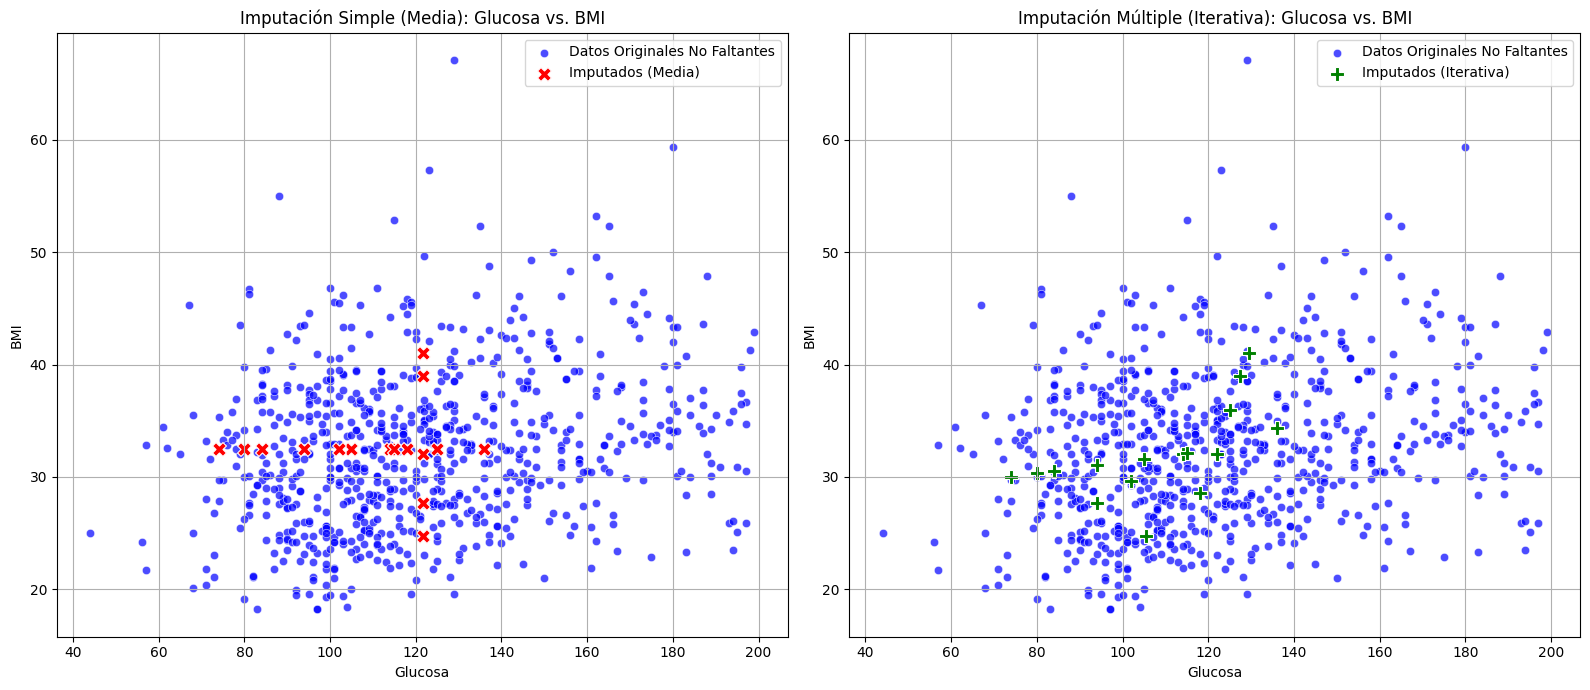

Gráficos de dispersión para visualización de imputaciones generados exitosamente.


In [2]:
# Importar librerías necesarias para visualización e imputación
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer # Importación necesaria para IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer
import kagglehub
from kagglehub import KaggleDatasetAdapter

# --- Preparar el DataFrame con valores NaN para la demostración de imputación ---
# Recargar el dataset original para asegurar que trabajamos con una base consistente
# y reintroducir los NaN a partir de los 0s en columnas relevantes.

file_path = "diabetes.csv"
df_original_with_zeros = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path
)

# Crear una copia para trabajar y reemplazar 0s con NaN en las columnas de interés
df_impute_base = df_original_with_zeros.copy()
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_impute_base[cols_to_impute] = df_impute_base[cols_to_impute].replace(0, np.nan)

print("DataFrame con valores NaN preparado para la visualización de imputaciones.")

# Identificar qué valores eran originalmente NaN en las columnas seleccionadas para el gráfico
missing_mask_glucose = df_impute_base['Glucose'].isna()
missing_mask_bmi = df_impute_base['BMI'].isna()
imputed_points_mask = missing_mask_glucose | missing_mask_bmi # Máscara para puntos que serán imputados en el gráfico

# ----------------------------------------------------------------------
# 1. Imputación Simple (Media)
# ----------------------------------------------------------------------
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_simple_imputed_values = imputer_mean.fit_transform(df_impute_base[cols_to_impute])

# Crear un DataFrame para los resultados de la imputación simple
df_simple_imputed = df_impute_base.copy()
df_simple_imputed[cols_to_impute] = df_simple_imputed_values
print("Imputación Simple (Media) completada.")

# ----------------------------------------------------------------------
# 2. Imputación Múltiple (Iterativa)
# ----------------------------------------------------------------------
imputer_iterative = IterativeImputer(
    random_state=0,
    sample_posterior=False,  # para reproducibilidad
    max_iter=50,
    tol=1e-3
)
df_iterative_imputed_values = imputer_iterative.fit_transform(df_impute_base[cols_to_impute])

# Crear un DataFrame para los resultados de la imputación iterativa
df_iterative_imputed = df_impute_base.copy()
df_iterative_imputed[cols_to_impute] = df_iterative_imputed_values
print("Imputación Múltiple (Iterativa) completada.")

# ----------------------------------------------------------------------
# 3. Visualización: Nubes de puntos para Glucosa vs. BMI
# ----------------------------------------------------------------------
plt.figure(figsize=(16, 7))

# --- Nube de puntos para Imputación Simple (Media) ---
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
# Plotear los valores originales no faltantes
sns.scatterplot(x=df_impute_base.loc[~imputed_points_mask, 'Glucose'],
                y=df_impute_base.loc[~imputed_points_mask, 'BMI'],
                color='blue', label='Datos Originales No Faltantes', alpha=0.7)
# Plotear los valores imputados por la media
sns.scatterplot(x=df_simple_imputed.loc[imputed_points_mask, 'Glucose'],
                y=df_simple_imputed.loc[imputed_points_mask, 'BMI'],
                color='red', marker='X', s=100, label='Imputados (Media)')
plt.title('Imputación Simple (Media): Glucosa vs. BMI')
plt.xlabel('Glucosa')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)

# --- Nube de puntos para Imputación Múltiple (Iterativa) ---
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
# Plotear los valores originales no faltantes
sns.scatterplot(x=df_impute_base.loc[~imputed_points_mask, 'Glucose'],
                y=df_impute_base.loc[~imputed_points_mask, 'BMI'],
                color='blue', label='Datos Originales No Faltantes', alpha=0.7)
# Plotear los valores imputados por el IterativeImputer
sns.scatterplot(x=df_iterative_imputed.loc[imputed_points_mask, 'Glucose'],
                y=df_iterative_imputed.loc[imputed_points_mask, 'BMI'],
                color='green', marker='P', s=100, label='Imputados (Iterativa)')
plt.title('Imputación Múltiple (Iterativa): Glucosa vs. BMI')
plt.xlabel('Glucosa')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Gráficos de dispersión para visualización de imputaciones generados exitosamente.")

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

# Es importante trabajar con el DataFrame que ya tiene los valores ausentes tratados.
# Usaremos df_iterative_imputed que fue generado en la celda anterior (ulPbWsyLDPP3)
# para demostrar la normalización, ya que contiene los datos después de una imputación más robusta.

# Identificamos las columnas numéricas para normalizar (excluyendo la columna 'Outcome' si es la variable objetivo)
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Crear copias del DataFrame imputado para cada tipo de normalización
df_minmax_scaled = df_iterative_imputed.copy()
df_zscore_scaled = df_iterative_imputed.copy()

print("Aplicando Min-Max Scaling...")
# Inicializar y aplicar MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df_minmax_scaled[numerical_cols])
print("Min-Max Scaling completado.\n")

print("Aplicando Z-score Standardization...")
# Inicializar y aplicar StandardScaler
scaler_zscore = StandardScaler()
df_zscore_scaled[numerical_cols] = scaler_zscore.fit_transform(df_zscore_scaled[numerical_cols])
print("Z-score Standardization completado.\n")

print("Primeras 5 filas del DataFrame después de Min-Max Scaling:")
print(df_minmax_scaled[numerical_cols].head())
print("\nEstadísticas descriptivas después de Min-Max Scaling:")
print(df_minmax_scaled[numerical_cols].describe())

print("\n---\n")

print("Primeras 5 filas del DataFrame después de Z-score Standardization:")
print(df_zscore_scaled[numerical_cols].head())
print("\nEstadísticas descriptivas después de Z-score Standardization:")
print(df_zscore_scaled[numerical_cols].describe())

Aplicando Min-Max Scaling...
Min-Max Scaling completado.

Aplicando Z-score Standardization...
Z-score Standardization completado.

Primeras 5 filas del DataFrame después de Min-Max Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.272748  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.105250  0.171779   
2     0.470588  0.896774       0.408163       0.157462  0.342307  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.136919  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.221850  0.509202   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  

Estadísticas descriptivas después de Min-Max Scaling:
       Pregnancies     Glucose  BloodPressure

### Visualización de Distribuciones después de Min-Max Scaling y Z-score Standardization

A continuación, se muestran los histogramas de las características numéricas después de aplicar Min-Max Scaling y Z-score Standardization. Esto nos permite observar cómo cada método de preprocesamiento ha transformado la distribución de los datos.

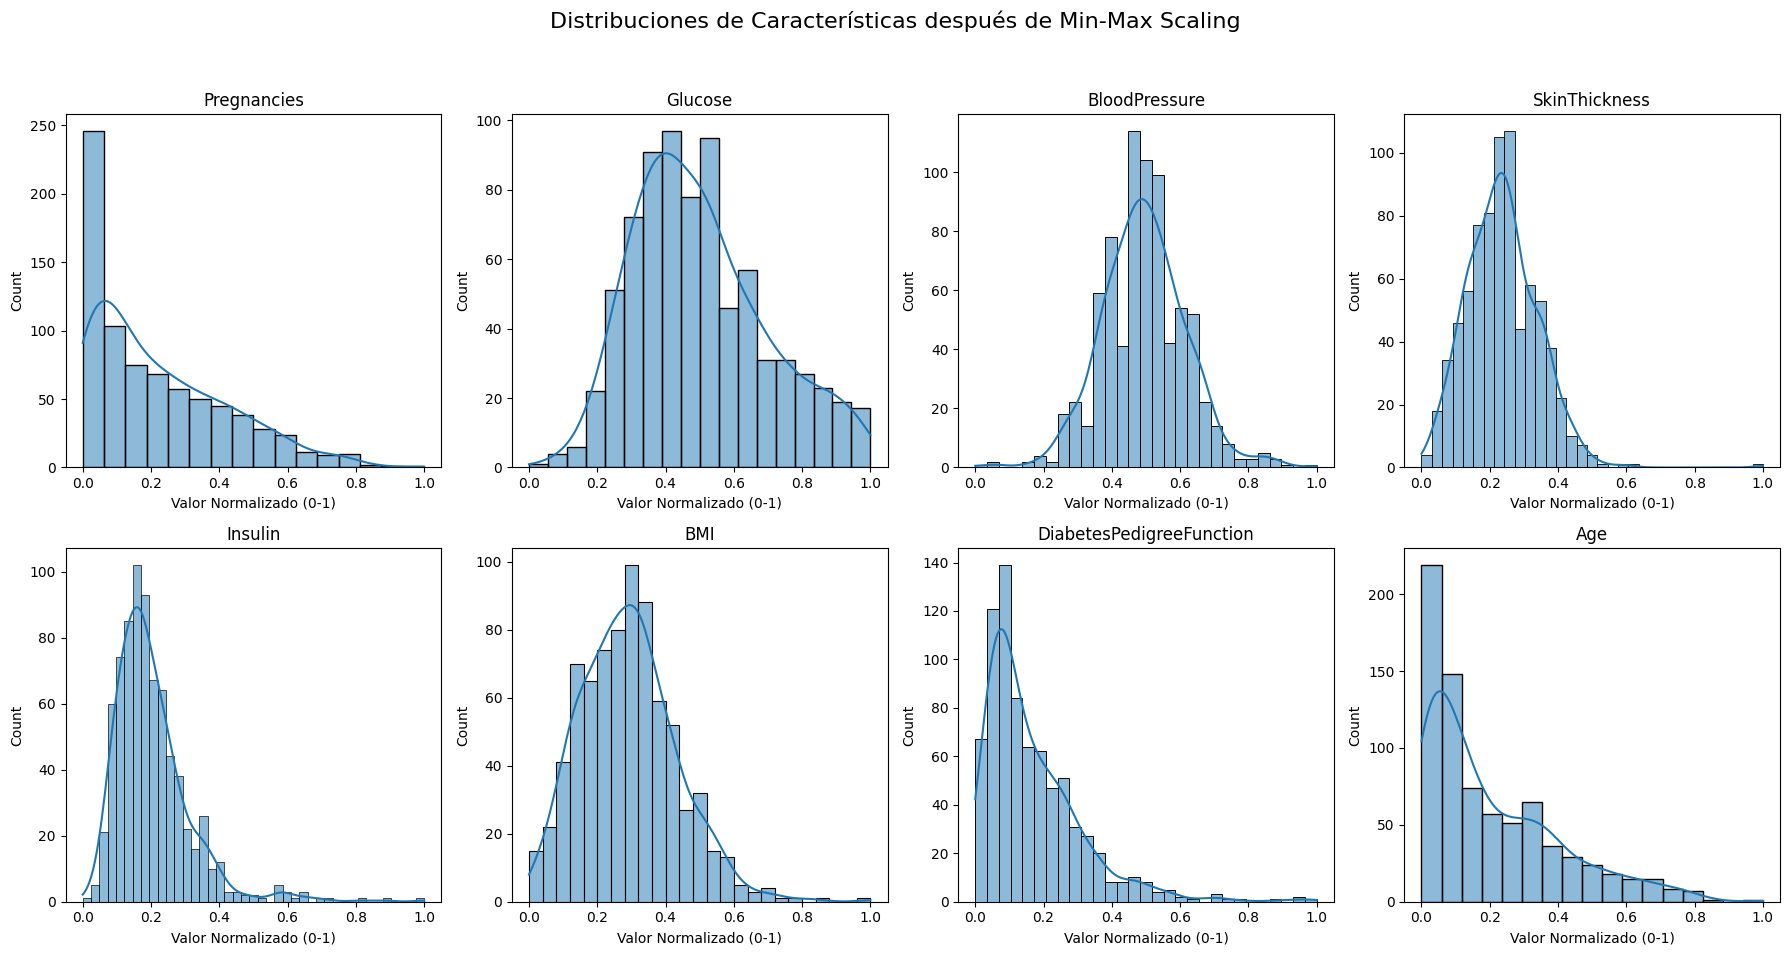

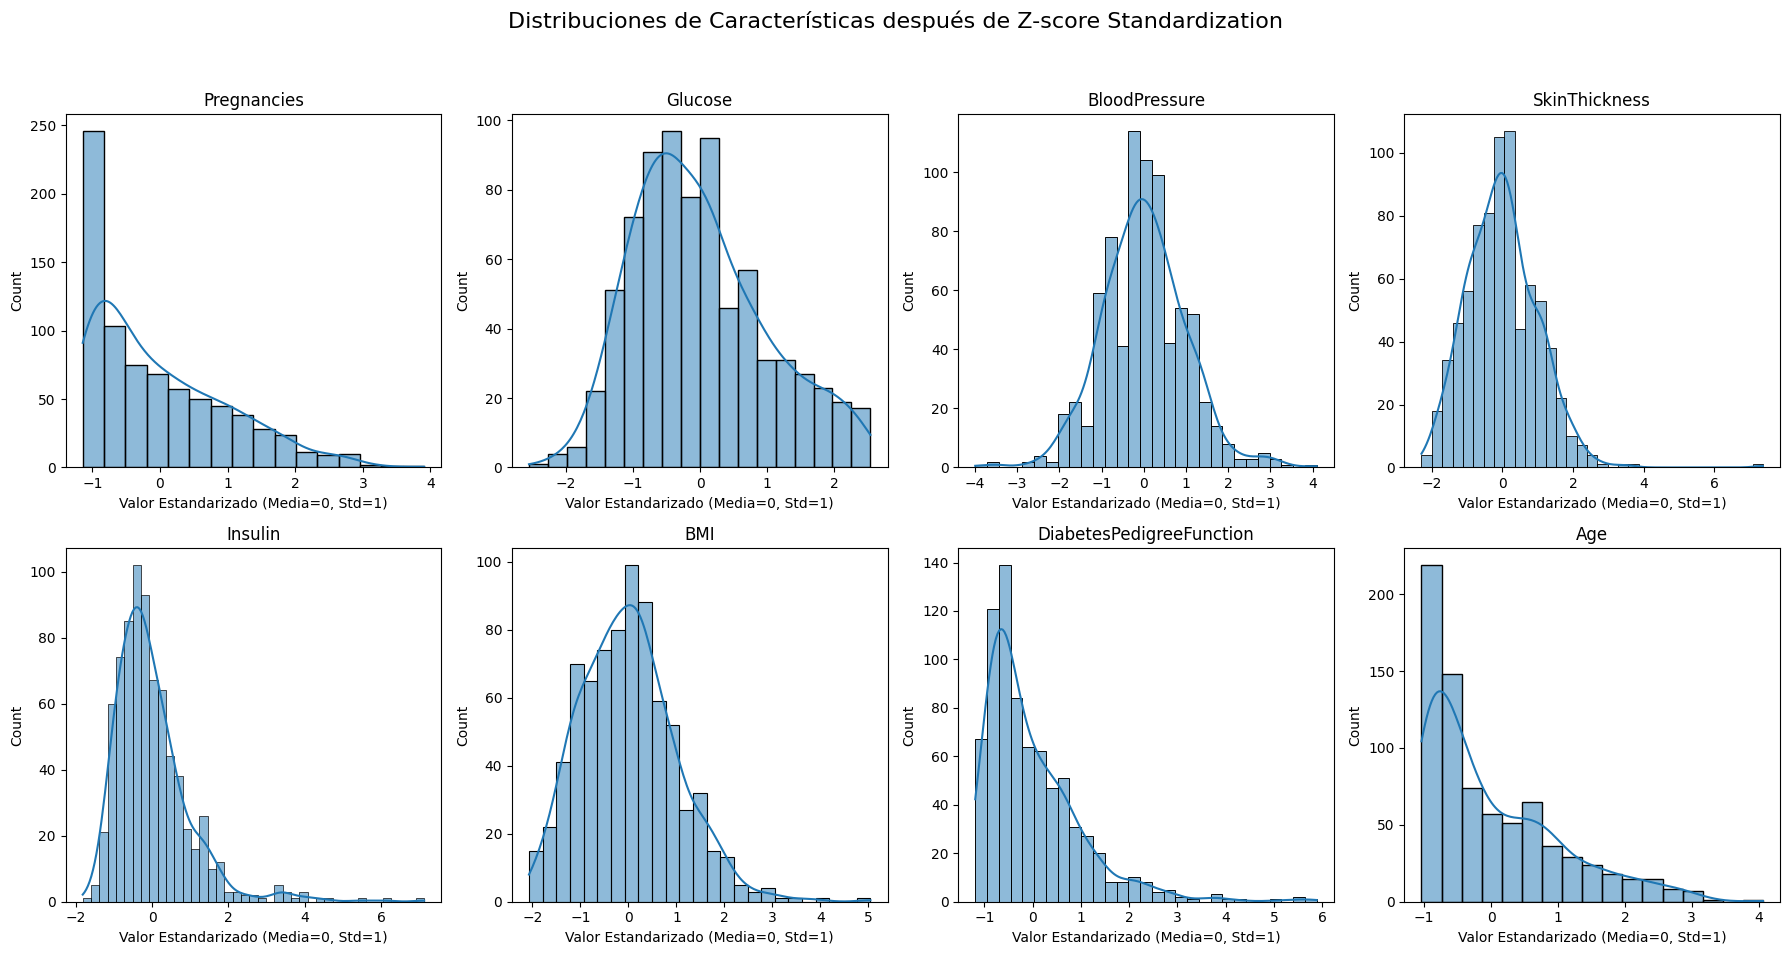

Histogramas de las distribuciones escaladas generados exitosamente.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la lista de columnas numéricas del kernel
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# --- Histograma para Min-Max Scaling ---
plt.figure(figsize=(18, 10))
plt.suptitle('Distribuciones de Características después de Min-Max Scaling', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1) # 2 filas, 4 columnas de subplots
    sns.histplot(df_minmax_scaled[col], kde=True)
    plt.title(col)
    plt.xlabel('Valor Normalizado (0-1)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Histograma para Z-score Standardization ---
plt.figure(figsize=(18, 10))
plt.suptitle('Distribuciones de Características después de Z-score Standardization', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1) # 2 filas, 4 columnas de subplots
    sns.histplot(df_zscore_scaled[col], kde=True)
    plt.title(col)
    plt.xlabel('Valor Estandarizado (Media=0, Std=1)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Histogramas de las distribuciones escaladas generados exitosamente.")